In [ ]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import random
import math

<h1>UNSUPERVISED LEARNING (CLUSTERING)

 Meng-<i>input</i> dataset (kendaraaan_train.csv)

In [ ]:
data_kendaraanTrain = pd.read_csv("kendaraan_train.csv")
data_kendaraanTrain.head()

Periksa dataset apakah terdapat data NaN/Null/Kosong pada setiap rownya

In [ ]:
data_kendaraanTrain.isnull().values.any()

Karena terdapat data NaN pada dataset, maka data yang memiliki value NaN akan di-drop

In [ ]:
data_kendaraanTrain = data_kendaraanTrain.dropna()

In [ ]:
data_kendaraanTrain.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
5,6,Pria,21.0,1.0,35.0,1.0,< 1 Tahun,Tidak,22735.0,152.0,171.0,0
8,9,Wanita,20.0,1.0,8.0,1.0,< 1 Tahun,Tidak,30786.0,160.0,31.0,0


In [ ]:
data_kendaraanTrain.dtypes

id                     int64
Jenis_Kelamin         object
Umur                 float64
SIM                  float64
Kode_Daerah          float64
Sudah_Asuransi       float64
Umur_Kendaraan        object
Kendaraan_Rusak       object
Premi                float64
Kanal_Penjualan      float64
Lama_Berlangganan    float64
Tertarik               int64
dtype: object

Karena tipe data Jenis_Kelamin, Umur_Kendaraan, dan Kendaraan_Rusak bertipe objek, maka kolom-kolom tersebut dirubah ke tipe numerik

In [ ]:
data_kendaraanTrain['Jenis_Kelamin'] = LabelEncoder().fit_transform(data_kendaraanTrain['Jenis_Kelamin'])
data_kendaraanTrain['Umur_Kendaraan'] = LabelEncoder().fit_transform(data_kendaraanTrain['Umur_Kendaraan'])
data_kendaraanTrain['Kendaraan_Rusak'] = LabelEncoder().fit_transform(data_kendaraanTrain['Kendaraan_Rusak'])

In [ ]:
data_kendaraanTrain.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,2,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,4,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,6,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
8,9,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0


Kolom id tidak digunakan, maka akan di-drop

In [ ]:
data_kendaraanTrain = data_kendaraanTrain.drop(['id'], axis=1)

In [ ]:
data_kendaraanTrain.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,33.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,39.0,0.0,2,0,25800.0,29.0,158.0,0
3,1,58.0,1.0,48.0,0.0,0,1,2630.0,124.0,63.0,0
5,0,21.0,1.0,35.0,1.0,1,1,22735.0,152.0,171.0,0
8,1,20.0,1.0,8.0,1.0,1,1,30786.0,160.0,31.0,0


Dataset tersebut memiliki fitur lebih dari 2, maka dari itu, dataset dirubah ke bentuk PCA atau Principal component analysis.

In [ ]:
pca = PCA(n_components=2)
data_kendaraanTrain_pca = pca.fit_transform(data_kendaraanTrain.drop(['Tertarik'], axis=1))

Setelah dataset dirubah, maka akan terlihat seperti array di bawah (2 Dimensi)

In [ ]:
data_kendaraanTrain_pca

array([[-2.47776147e+03, -5.72376644e+01],
       [-4.70671699e+03,  3.63637212e+00],
       [-2.78767482e+04, -9.14421772e+01],
       ...,
       [ 1.92442358e+04,  7.18943512e+01],
       [-3.75029075e+00,  1.15761727e+02],
       [ 5.97328402e+03, -1.10289210e+02]])

VISUALISASI DATASET PCA

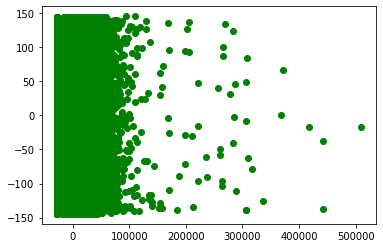

In [ ]:
plt.scatter(data_kendaraanTrain_pca[:,0],data_kendaraanTrain_pca[:,1], color=["green"])
plt.show()

<h3>Fungsi-fungsi yang digunakan untuk K-NN</h3>

In [ ]:
#menghtiung jarak menggunakan metode Euclidean Distance
def euclidianDistance(a,b):
    hasil = 0
    for i in range(len(a)):
        hasil = hasil + math.pow(a[i]-b[i],2)
    return math.sqrt(hasil)

#mencari rata-rata jarak antara data ke centroid, kemudian mengembalikan centroid baru
def meanCentroid(c):
    new_centroid = []
    for i in range(len(c[0])):
        res = 0
        for j in range(len(c)):
            res = res + c[j][i]
        res = res/len(c)
        new_centroid.append(res)
    return new_centroid

#menginisiasi data kosong pada setiap centroid
def initiateCentroidData():
    c_arr = []
    for i in range(len(centroid)):
        c_arr.append([])
    return c_arr

#menghitung akurasi
def calculateAcc2d(y_pred, y_val):
    y_pred = np.array(y_pred)
    y_val = np.array(y_val)
    res = 0
    if len(y_pred) == len(y_val):
        for i in range(len(y_pred)):
            if y_pred[i] == y_val[i]:
                res = res+1
        res = res/len(y_pred)
    return res

inisiasi jumlah K

In [ ]:
k = 2

Menginisiasi centroid awal dengan memilih data secara random pada dataset

In [ ]:
centroid = random.sample(list(data_kendaraanTrain_pca), k)
centroid = np.array(centroid)

Melakukan perulangan untuk menjalankan algoritma K-NN

In [ ]:
#perulangan sampai centroid sebelumnya dan centroid tidak berubah
while True:
    #inisiasi data terdekat (kosong) untuk setiap centroid
    cl_arr = initiateCentroidData()
    
    #perulangan untuk setiap data pada dataset
    for i in range(len(data_kendaraanTrain_pca)):
        
        #inisiasi index untuk jarak minimum
        idx_min = 0
        
        #menghitung jarak dari data i ke centroid 0
        min_dis = euclidianDistance(data_kendaraanTrain_pca[i],centroid[idx_min])
        
        #perulangan untuk menghitung jarak data i ke centroid selain 0
        for j in range(1,len(centroid)):
            
            #mengitung jarak dari data i ke centroid j
            temp_min = euclidianDistance(data_kendaraanTrain_pca[i],centroid[j])
            
            #memeriksa centroid manakah yang paling minimum 
            if min_dis > temp_min:
                idx_min = j
                min_dis = temp_min
        
        #memasukkan data i ke array centroid terdekat
        cl_arr[idx_min].append(data_kendaraanTrain_pca[i])
    
    #centroid lama disalin
    old_centroid = centroid.copy()
    
    #mencari centroid baru
    for i in range(len(centroid)):
        centroid[i] = meanCentroid(cl_arr[i])
        
    #memeriksa apakah centroid lama sama dengan centroid baru, jika iya maka perulangan terhenti
    if (old_centroid==centroid).all():
        break

Hasil centroid dari algoritma K-NN setelah dilatih pada data latih (kendaraan_train.csv)

In [ ]:
centroid

array([[ 6.12910270e+03,  9.08832943e-02],
       [-2.63913942e+04, -3.91335725e-01]])

<h3> Visualisasi hasil clustering terhadap dataset </h3>

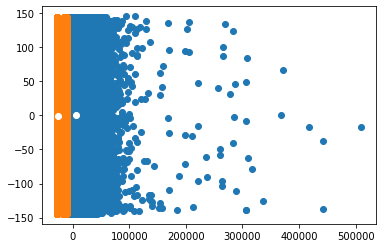

In [ ]:
if len(cl_arr[0][0]) == 2:
    for i in cl_arr:
        plt.scatter([row[0] for row in i],[row[1] for row in i])
    for i in centroid:
        plt.scatter(i[0],i[1],c='white')
    plt.show()
if len(cl_arr[0][0]) == 3:
    ax = plt.axes(projection="3d")
    for i in cl_arr:
        ax.scatter3D([row[0] for row in i],[row[1] for row in i],[row[2] for row in i])
    for i in centroid:
        ax.scatter3D(i[0],i[1],i[2],c='white')
    plt.show()

<h3> Menyimpan hasil clustering data latih</h3>

In [ ]:
try:
    with open('clustering_result.csv','wb') as file:
        #write column
#         str_write = 'x,y,'
#         file.write(str_write.encode())
        file.write('label'.encode())
        file.write('\n'.encode())
        #write data
        for i in range(len(c_arr)):
            for j in c_arr[i]:
#                 str_write = ''
#                 for k in j:
#                     str_write = str_write+str(k)+','
#                 file.write(str_write.encode())
                file.write(str(i).encode()) 
                file.write('\n'.encode())
    print('result saved in clustering_result.csv')
except:
    print('Result cant be saved!')

Result cant be saved!


<h3>Menghitung akurasi hasil prediksi data latih</h3>

Ambil label pada dataset

In [ ]:
y_value = data_kendaraanTrain['Tertarik']

Ambil label prediksi dari hasil clustering

In [ ]:
y_prediction = pd.read_csv('clustering_result.csv')
y_prediction = y_prediction['label']

Menghitung akurasinya

In [ ]:
acc = calculateAcc2d(y_value,y_prediction)
print('Akurasi data latih: ',acc)

Akurasi data latih:  0


<h3> Menerapkan centroid </h3>

Input data test

In [ ]:
data_kendaraanTest = pd.read_csv('kendaraan_test.csv')

Periksa data test apakah terdapat data NaN/Null/Kosong pada setiap rownya

In [ ]:
data_kendaraanTest.isnull().values.any()

False

In [ ]:
data_kendaraanTest.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [ ]:
data_kendaraanTest.dtypes

Jenis_Kelamin        object
Umur                  int64
SIM                   int64
Kode_Daerah           int64
Sudah_Asuransi        int64
Umur_Kendaraan       object
Kendaraan_Rusak      object
Premi                 int64
Kanal_Penjualan       int64
Lama_Berlangganan     int64
Tertarik              int64
dtype: object

Karena tipe data Jenis_Kelamin, Umur_Kendaraan, dan Kendaraan_Rusak bertipe objek, maka kolom-kolom tersebut dirubah ke tipe numerik

In [ ]:
data_kendaraanTest['Jenis_Kelamin'] = LabelEncoder().fit_transform(data_kendaraanTest['Jenis_Kelamin'])
data_kendaraanTest['Umur_Kendaraan'] = LabelEncoder().fit_transform(data_kendaraanTest['Umur_Kendaraan'])
data_kendaraanTest['Kendaraan_Rusak'] = LabelEncoder().fit_transform(data_kendaraanTest['Kendaraan_Rusak'])


fitur lebih dari 2, maka dataset dirubah ke bentuk PCA atau Principal component analysis.

In [ ]:
data_kendaraanTest_pca = pca.fit_transform(data_kendaraanTest.drop(['Tertarik'], axis=1))

In [ ]:
data_kendaraanTest_pca

array([[ 1.63365521e+04, -8.86774363e+00],
       [ 8.99749881e+03,  8.67398272e+01],
       [ 7.98524986e+04, -9.02465144e+01],
       ...,
       [ 2.47450042e+03,  5.65752208e+01],
       [ 7.16155076e+03,  8.48477398e+01],
       [-2.79964831e+04,  1.47422180e+01]])

<h3>Visual data test PCA</h3>

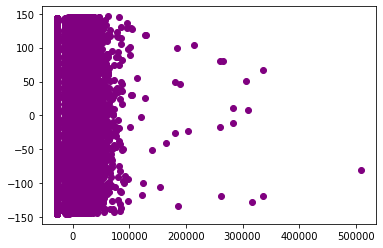

In [ ]:
plt.scatter(data_kendaraanTest_pca[:,0],data_kendaraanTest_pca[:,1], color = "purple")
plt.show()

Mengcluster data test dengan menghitung jarak setiap data terhadap centroid yang sebelumnya sudah didapatkan

In [ ]:
c_arr_test = initiateCentroidData()
for i in range(len(data_kendaraanTest_pca)):
    

    idx_min = 0


    min_dis = euclidianDistance(data_kendaraanTest_pca[i],centroid[idx_min])


    for j in range(1,len(centroid)):

        temp_min = euclidianDistance(data_kendaraanTest_pca[i],centroid[j])


        if min_dis > temp_min:
            idx_min = j
            min_dis = temp_min

    c_arr_test[idx_min].append(data_kendaraanTest_pca[i])

<h3>Visualisasi cluster data test</h3>

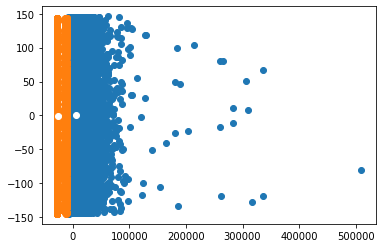

In [ ]:
for i in c_arr_test:
    plt.scatter([row[0] for row in i],[row[1] for row in i])
for i in centroid:
    plt.scatter(i[0],i[1],c='white')
plt.show()

Menyimpan hasil cluster data test

In [ ]:
try:
    with open('clustering_result_test.csv','wb') as file:
        #write column
#         str_write = 'x,y,'
#         file.write(str_write.encode())
        file.write('label'.encode())
        file.write('\n'.encode())
        #write data
        for i in range(len(c_arr)):
            for j in c_arr_test[i]:
#                 str_write = ''
#                 for k in j:
#                     str_write = str_write+str(k)+','
#                 file.write(str_write.encode())
                file.write(str(i).encode()) 
                file.write('\n'.encode())
    print('result saved in clustering_result_test.csv')
except:
    print('Result cant be saved!')

Result cant be saved!


<h3>Menghitung akurasi hasil prediksi data test</h3>

Ambil label pada dataset

In [ ]:
y_value_test = data_kendaraanTest['Tertarik']
y_prediction_test = pd.read_csv('clustering_result_test.csv')
y_prediction_test = y_prediction_test['label']

Menghitung akurasinya

In [ ]:
acc = calculateAcc2d(y_value_test,y_prediction_test)
print('Akurasi: ',acc)

Akurasi:  0
